**Imports**

In [1]:
import seaborn as sb
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

**Functions**

In [2]:
def mean(data):
    sum = 0
    for val in data:
        sum += val
    average = sum/len(data)
    return average
  
def median(data):
    data.sort()
    if len(data) % 2 == 0:
        middle = [data[len(data)//2 - 1], data[len(data)//2]]
        mid_avg = mean(middle)
        return mid_avg
    else:
        middle = data[len(data)//2]
        return middle

def variance(data):
    sum = 0
    for num in data:
        sum += (num - mean(data))**2
    vari = sum/len(data)
    return vari

def stand_dev(data):
    de = math.sqrt(variance(data))
    return de
  
def elem_stats(data, rounder=False):
    if rounder== True:
        data_stats = {"mean": round(mean(data), 2), 'median': round(median(data), 2), 'variance': round(variance(data),2), 'standard_deviance': round(stand_dev(data),2), "min": round(min(data),2), 'max': round(max(data),2)}
    else:
        data_stats = {"mean": mean(data), 'median':median(data), 'variance':variance(data), 'standard_deviance': stand_dev(data), "min": min(data), 'max': max(data)}
    return data_stats

def line_graph(x_list, y_list, x_label = None, y_label = None, amount=1, colour='blue', mark="o", line='-'):
    '''amount is number of lines on a graph. if the amount is greater than one, submit lists of lists for the other three paramters. ex: amount=1, x_list=[1,2,3] or amount=2, x_list=[[1,2,3],[4,5,6]]'''
    if amount >1:
        for num in range(0, amount):
            plt.plot(x_list[num], y_list[num], color=colour[num], marker=mark[num], linestyle=line[num])
    else:
        plt.plot(x_list, y_list, color=colour, marker=mark, linestyle=line)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    
def weight_move_avg(values, weights):
    length = len(weights)
    divisor = sum(weights)
    averages = []
    aver = 0
    counter = 0
    for i in range(0,len(values)+1-length):
        for num in range(i,length+i):
            aver += values[num] * weights[counter]
            counter+=1
        counter-=counter
        aver = aver/divisor
        aver = round(aver,2)
        averages.append(aver)
        aver-=aver
            
    return averages

def fade_mem_avg(values, weights):
    averages = []
    f = values[0]
    for i in range(0, len(values)):
        f = weights[0] * f + weights[1] * values[i]
        averages.append(round(f, 2))
#         F[N] = weights[0]*F[N-1] + weights[1]*values[N]
    return averages

def least_squares_array(array1, array2):
    x_sq = np.sum(np.power(array1, 2))
    x_sum = np.sum(array1)
    xy_sum = np.sum(np.multiply(array1, array2))
    y_sum = np.sum(array2)
    
    array_reg = np.array([[x_sq, x_sum], [x_sum, len(array1)]])
    array_2 = np.array([xy_sum, y_sum])
    array_inverse = np.linalg.inv(array_reg)
    answer = np.dot(array_inverse, array_2)
    return answer

def slope_to_points(slope, intercept, point_nums):
    list_x = []
    list_y = []
    for num in point_nums:
        list_x.append(num)
        y_point = slope * num + intercept
        list_y.append(y_point)
    return list_x, list_y

def correlation_array(array1, array2):
    x_sum = np.sum(array1)
    y_sum = np.sum(array2)
    e1 = np.sum(np.multiply(array1, array2))
    x_sq = np.sum(np.power(array1, 2))
    y_sq = np.sum(np.power(array2,2))
    
    e1 = e1*len(array1)

    x_sq_sub = (x_sq *len(array1)) - x_sum**2
    x_sqed = math.sqrt(x_sq_sub)
    
    y_sq_sub = (y_sq * len(array2)) - y_sum**2
    y_sqed = math.sqrt(y_sq_sub)
    
    top = e1 - (x_sum * y_sum)
    bottom = x_sqed*y_sqed
    
    corr = top / bottom
    
    return corr

**Dataframes**

In [3]:
pcp_path = "/kaggle/input/percipitation2/All_Months_PCP_1895_2022_1.csv"
pcp=pd.read_csv(pcp_path, sep=",")

temp_path = "/kaggle/input/temperatures/Bri Auspland - All_Months_Temp_1895_2022.csv"
temp=pd.read_csv(temp_path, sep=",")
temp

,Date,January Temp(F),February Temp(F),March Temp(F),April Temp(F),May Temp(F),June Temp(F),July Temp(F),August Temp(F),September Temp(F),October Temp(F),November Temp(F),December Temp(F)
0,1895,12.2,11.8,21.3,38.1,53.3,62.7,63.2,61.6,55.6,39.3,32.6,20.7
1,1896,10.4,13.7,20.9,38.3,50.8,58.9,64.8,61.7,52.8,41.3,31.4,15.0
2,1897,12.8,16.0,23.4,38.3,49.5,55.2,65.1,61.2,52.9,44.5,30.0,18.7
3,1898,9.4,19.2,29.8,36.2,50.4,58.8,64.8,64.1,55.9,44.3,32.4,16.6
4,1899,11.7,11.9,21.7,39.0,49.8,59.8,63.8,62.4,53.1,45.6,30.4,22.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,2018,15.0,22.7,28.9,36.5,53.5,59.0,68.8,68.0,57.9,41.9,28.6,20.4
124,2019,14.1,16.3,24.7,38.8,48.1,59.5,68.3,64.5,55.3,46.1,29.6,22.8
125,2020,20.8,20.1,29.6,37.7,51.2,62.5,68.9,65.6,56.8,44.7,37.0,27.2
126,2021,21.4,18.5,29.4,43.2,52.4,64.9,63.6,68.2,59.0,50.2,35.3,24.4


In [4]:
pcp

,Date,January Inches,February Inches,March Inches,April Inches,May Inches,June Inches,July Inches,August Inches,September Inches,October Inches,November Inches,December Inches
0,1895,3.51,1.42,1.97,3.97,2.12,2.96,2.98,3.45,1.41,1.88,6.52,4.04
1,1896,0.89,4.34,6.35,1.65,2.39,2.95,4.47,3.48,6.04,3.83,4.27,1.34
2,1897,3.36,2.15,3.67,2.65,5.04,4.03,5.43,4.20,2.71,1.31,5.33,3.63
3,1898,5.10,6.46,1.96,3.46,2.00,4.54,2.66,3.60,2.98,5.90,5.35,2.09
4,1899,2.83,2.48,5.17,0.96,2.54,3.37,5.55,1.11,3.39,2.31,2.70,2.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,2018,4.78,3.02,2.95,4.65,1.92,3.69,4.06,3.78,3.15,4.48,6.18,3.79
124,2019,5.25,2.87,2.19,5.37,4.49,4.69,3.31,4.80,3.46,5.73,4.08,3.75
125,2020,3.06,2.85,2.70,4.17,2.62,2.29,3.85,2.81,1.00,6.12,3.83,5.33
126,2021,1.89,2.90,1.98,3.24,2.74,2.22,5.46,2.66,6.46,3.78,3.28,3.15


**Code**

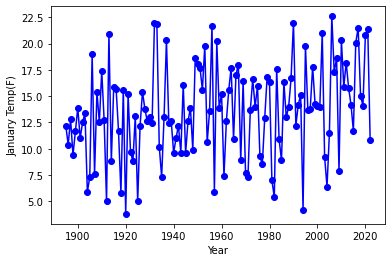

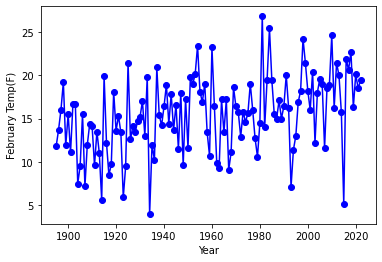

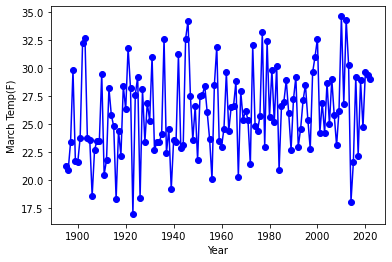

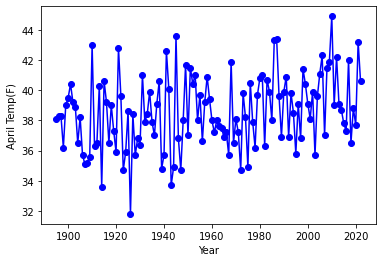

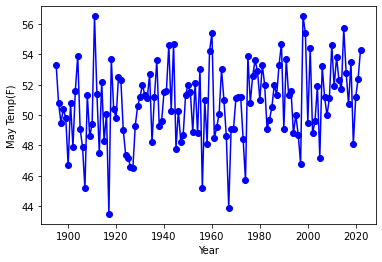

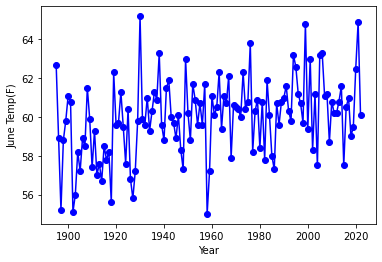

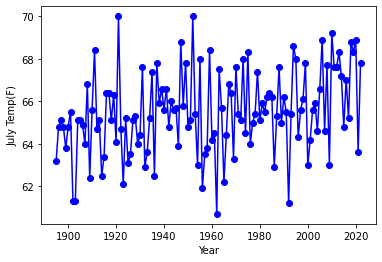

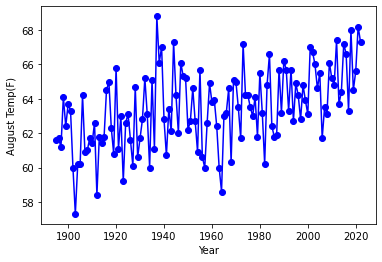

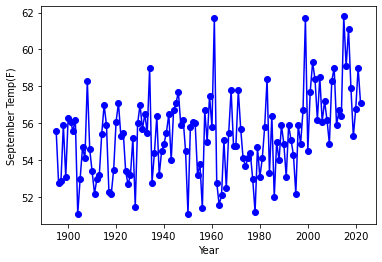

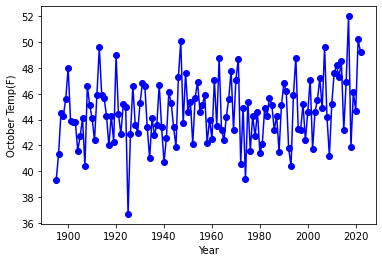

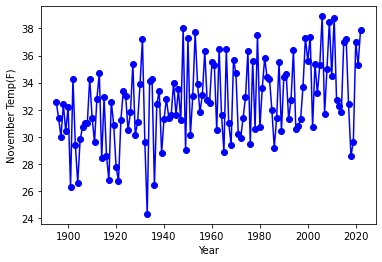

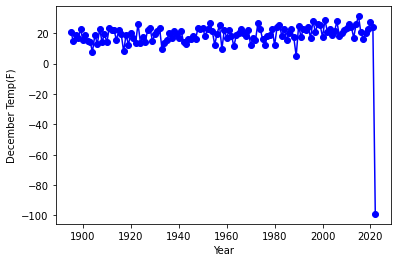

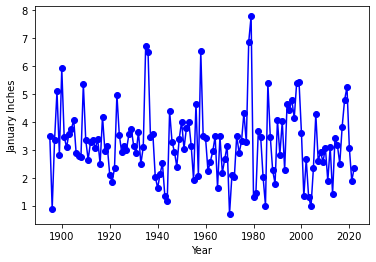

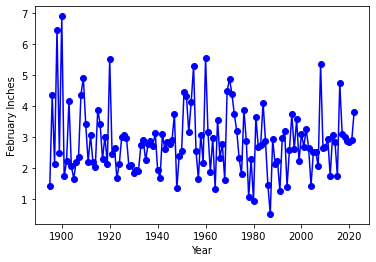

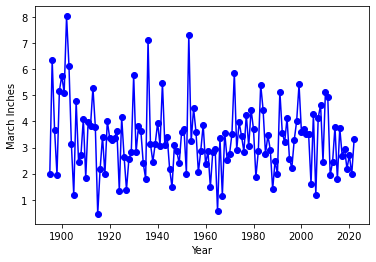

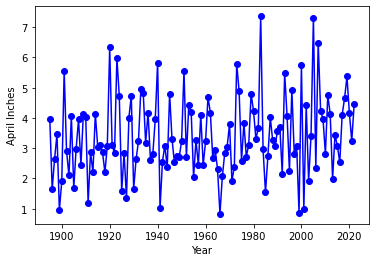

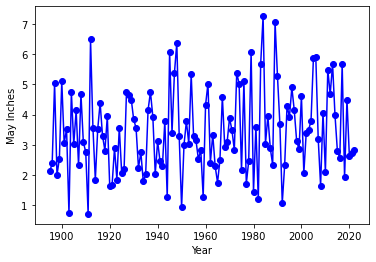

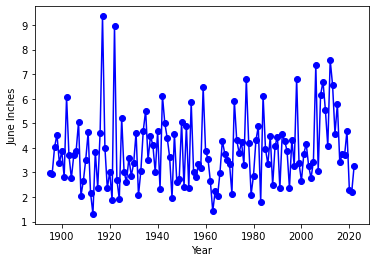

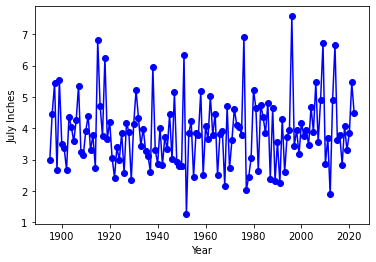

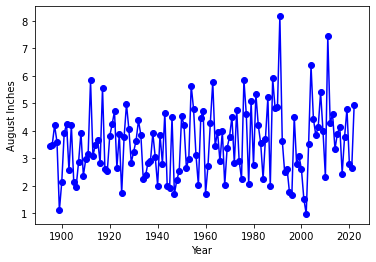

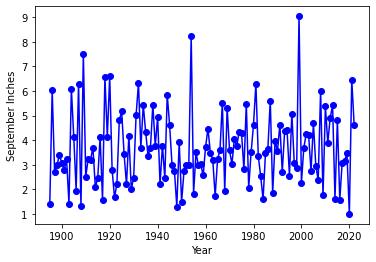

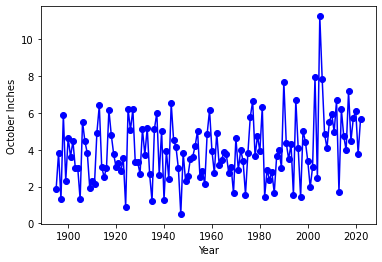

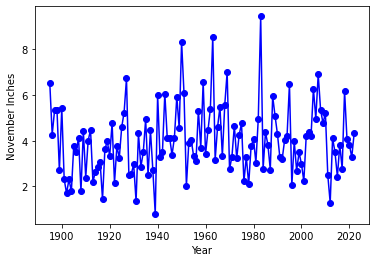

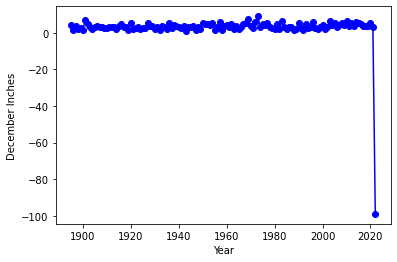

In [5]:
# graphs of the raw data of each month per year

for column in temp.drop(columns=['Date']):
    line_graph(temp['Date'], temp[f"{column}"], x_label = "Year", y_label = column, amount=1)

for column in pcp.drop(columns=['Date']):
    line_graph(pcp['Date'], pcp[f"{column}"], x_label = "Year", y_label = column, amount=1)

1). Compute the mean, median, standard deviation, max and min for both each year across all months.

2). Compute the mean, median, standard deviation, max and min for both month across all years. Determine the year where each max and min occurred for each month.

In [6]:
###TEMPERATURE###

elem_temp_year = {} #temp per year
listt = [] # year and all temps, list of list
for bop in range(0,len(temp)): # for each item in temp
    listt.append((temp.iloc[bop]).to_list()) # listt will gain a list of an entire row
    
for bop in range(0,len(listt)): # i have changed the word index to bop
    for item in listt[bop][1:]: #for each item in listt but not the year
        if item == -99:
            listt[bop][listt[bop].index(item)] = round(mean([listt[bop-4][listt[bop].index(item)], listt[bop-3][listt[bop].index(item)], listt[bop-2][listt[bop].index(item)], listt[bop-1][listt[bop].index(item)]]), 2)
            #replaces -99 with the mean of the last 4 temps of that month ^
    elem_temp_year[listt[bop][0]] = elem_stats(listt[bop][1:], rounder=True)

###

elem_temp_month = {}

for column in temp.drop(columns=['Date']):
    stuff = temp[column].to_list()
    for item in stuff:
        if item == -99:
            stuff[stuff.index(item)] = round(mean([stuff[stuff.index(item)-4], stuff[stuff.index(item)-3], stuff[stuff.index(item)-2], stuff[stuff.index(item)-1]]), 2)
    elem_temp_month[column] = elem_stats(stuff, rounder=True)

###
    
year_temp = pd.DataFrame.from_dict(elem_temp_year)
month_temp = pd.DataFrame.from_dict(elem_temp_month)

###
for month in temp.drop(columns=['Date']): #goes through the temp columns
    for ind in range(0,len(temp[month])):
        if temp[month][ind] == month_temp[month][4]:
            elem_temp_month[month]["min year"] = str(temp["Date"][ind])
        elif temp[month][ind] == month_temp[month][5]:
            elem_temp_month[month]["max year"] = str(temp["Date"][ind])
            
month_temp = pd.DataFrame.from_dict(elem_temp_month)
month_temp

,January Temp(F),February Temp(F),March Temp(F),April Temp(F),May Temp(F),June Temp(F),July Temp(F),August Temp(F),September Temp(F),October Temp(F),November Temp(F),December Temp(F)
mean,13.57,15.46,25.95,38.53,50.73,59.96,65.48,63.42,55.35,44.61,32.62,19.39
median,13.7,15.7,25.65,38.35,51.0,60.1,65.35,63.3,55.5,44.55,32.45,19.65
variance,19.83,19.44,14.58,5.84,6.44,4.04,3.81,5.09,4.97,6.35,8.88,22.39
standard_deviance,4.45,4.41,3.82,2.42,2.54,2.01,1.95,2.26,2.23,2.52,2.98,4.73
min,3.8,4.0,17.0,31.8,43.5,55.0,60.7,57.3,51.1,36.7,24.3,5.0
max,22.6,26.8,34.6,44.9,56.5,65.2,70.0,68.8,61.8,52.0,38.9,31.2
min year,1920,1934,1923,1926,1917,1958,1962,1903,1950,1925,1933,1989
max year,2006,1981,2010,2010,1998,1930,1952,1937,2015,2017,2006,2015


In [7]:
###PERCIPITATION###

elem_pcp_year = {}
lisss = [] 
for bop in range(0,len(temp)):
    lisss.append((pcp.iloc[bop]).to_list())
    
for bop in range(0,len(lisss)):
    for item in lisss[bop][1:]:
        if item == -99:
            lisss[bop][lisss[bop].index(item)] = round(mean([lisss[bop-4][lisss[bop].index(item)], lisss[bop-3][lisss[bop].index(item)], lisss[bop-2][lisss[bop].index(item)], lisss[bop-1][lisss[bop].index(item)]]), 2)
    elem_pcp_year[lisss[bop][0]] = elem_stats(lisss[bop][1:], rounder=True)

###

elem_pcp_month = {}

for column in pcp.drop(columns=['Date']):
    stuffff = pcp[column].to_list()
    for item in stuffff:
        if item == -99:
            stuffff[stuffff.index(item)] = round(mean([stuffff[stuffff.index(item)-4], stuffff[stuffff.index(item)-3], stuffff[stuffff.index(item)-2], stuffff[stuffff.index(item)-1]]), 2)
    elem_pcp_month[column] = elem_stats(stuffff, rounder=True)

###
    
year_pcp = pd.DataFrame.from_dict(elem_pcp_year)
month_pcp = pd.DataFrame.from_dict(elem_pcp_month)

###
for month in pcp.drop(columns=['Date']): #goes through the temp columns
    for ind in range(0,len(pcp[month])):
        if pcp[month][ind] == month_pcp[month][4]:
            elem_pcp_month[month]["min year"] = str(pcp["Date"][ind])
        elif pcp[month][ind] == month_pcp[month][5]:
            elem_pcp_month[month]["max year"] = str(pcp["Date"][ind])
            
month_pcp = pd.DataFrame.from_dict(elem_pcp_month)
month_pcp

,January Inches,February Inches,March Inches,April Inches,May Inches,June Inches,July Inches,August Inches,September Inches,October Inches,November Inches,December Inches
mean,3.22,2.85,3.32,3.39,3.43,3.85,3.87,3.56,3.67,3.96,3.98,3.63
median,3.13,2.75,3.21,3.11,3.24,3.66,3.79,3.54,3.49,3.79,3.87,3.36
variance,1.64,1.18,1.8,1.71,1.96,2.17,1.25,1.59,2.3,2.96,2.26,2.03
standard_deviance,1.28,1.08,1.34,1.31,1.4,1.47,1.12,1.26,1.52,1.72,1.5,1.42
min,0.7,0.53,0.46,0.83,0.71,1.31,1.27,0.98,1.0,0.51,0.8,1.17
max,7.79,6.89,8.02,7.36,7.26,9.36,7.57,8.17,9.04,11.26,9.44,9.04
min year,1970,1987,1915,1966,1911,1913,1952,2002,2020,1947,1939,1943
max year,1979,1900,1902,1983,1984,1917,1996,1991,1999,2005,1983,1973


3). Plot the mean, median, min and max as a function of year.

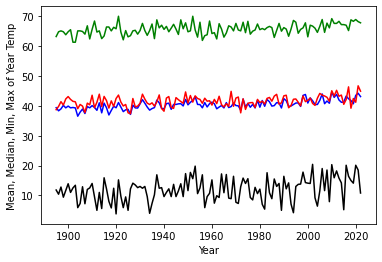

In [8]:
line_graph([temp["Date"], temp["Date"], temp["Date"], temp["Date"]], [year_temp.iloc[0], year_temp.iloc[1], year_temp.iloc[4], year_temp.iloc[5]], x_label = "Year", y_label = "Mean, Median, Min, Max of Year Temp", amount=4, colour=['blue', "red", "black", "green"], mark=['', '', '', ''], line=['-','-','-','-'])
#blue is mean, red is median, black is min, green is max
#TEMPERATURE

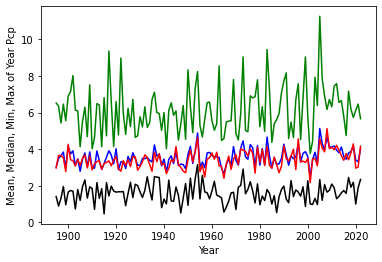

In [9]:
line_graph([pcp["Date"], pcp["Date"], pcp["Date"], pcp["Date"]], [year_pcp.iloc[0], year_pcp.iloc[1], year_pcp.iloc[4], year_pcp.iloc[5]], x_label = "Year", y_label = "Mean, Median, Min, Max of Year Pcp", amount=4, colour=['blue', "red", "black", "green"], mark=['', '', '', ''], line=['-','-','-','-'])
#blue is mean, red is median, black is min, green is max
#PERCIPITAION

4). For each month, plot the year that maximum and minimum values were obtained.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

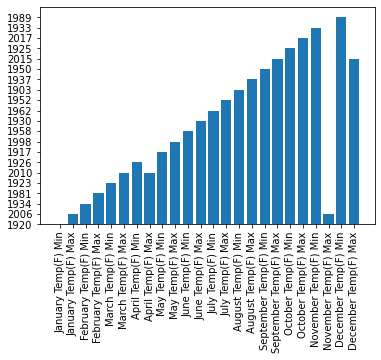

In [10]:
month_2 = []
min_max = []
for month in month_temp:
    month_2.append(month + " Min")
    month_2.append(month + " Max")
    min_max.append(month_temp[month][6])
    min_max.append(month_temp[month][7])
plt.bar(month_2, min_max)
plt.xticks(rotation=90)
#This graph is quite hard to understand but I couldn't think of a better way to show it. Basically, each month is a bar and the height corresponds either to the ear the minimum temp occurred or the maximum temp occured.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

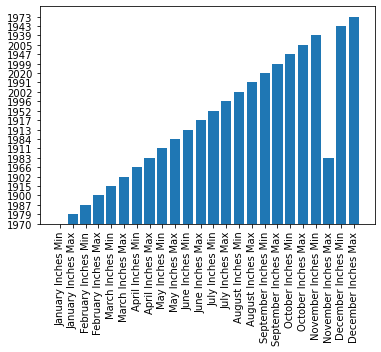

In [11]:
month_22 = []
min_max2 = []
for month in month_pcp:
    month_22.append(month + " Min")
    month_22.append(month + " Max")
    min_max2.append(month_pcp[month][6])
    min_max2.append(month_pcp[month][7])
plt.bar(month_22, min_max2)
plt.xticks(rotation=90)

Plot both the raw and smoothed data for the mean, median, min and max as a function of year for both the temperature and precipitation data.

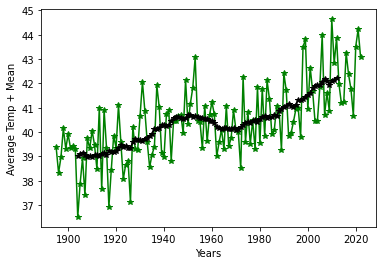

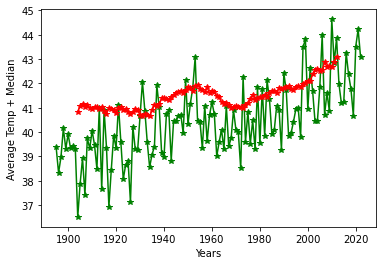

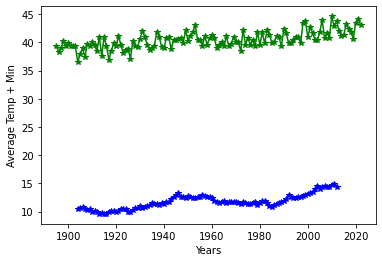

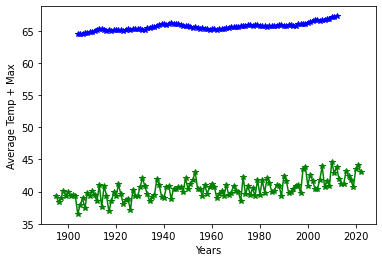

In [12]:
##TEMP##
wei = []
for n in range(0,20):
    wei.append(1)
line_graph([temp["Date"], temp["Date"][9:-10]], [year_temp.iloc[0], weight_move_avg((year_temp.iloc[0]).to_list(), wei)], x_label = "Years", y_label = "Average Temp + Mean", amount=2, colour=['green', 'black'], mark=["*", '*'], line=['-', '-'])

line_graph([temp["Date"], temp["Date"][9:-10]], [year_temp.iloc[0], weight_move_avg((year_temp.iloc[1]).to_list(), wei)], x_label = "Years", y_label = "Average Temp + Median", amount=2, colour=['green', 'red'], mark=["*", '*'], line=['-', '-'])

line_graph([temp["Date"], temp["Date"][9:-10]], [year_temp.iloc[0], weight_move_avg((year_temp.iloc[4]).to_list(), wei)], x_label = "Years", y_label = "Average Temp + Min", amount=2, colour=['green', 'blue'], mark=["*", '*'], line=['-', '-'])

line_graph([temp["Date"], temp["Date"][9:-10]], [year_temp.iloc[0], weight_move_avg((year_temp.iloc[5]).to_list(), wei)], x_label = "Years", y_label = "Average Temp + Max", amount=2, colour=['green', 'blue'], mark=["*", '*'], line=['-', '-'])

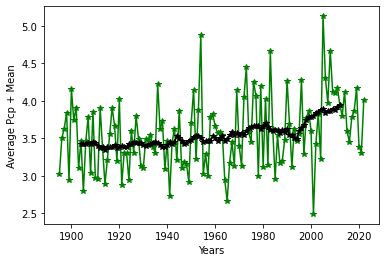

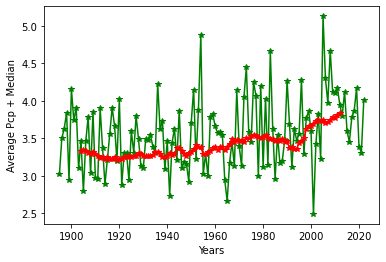

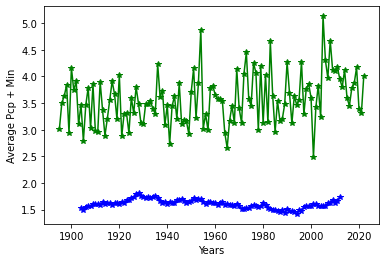

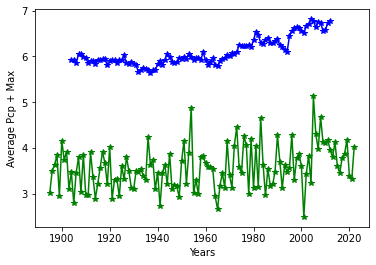

In [13]:
##PCP##
line_graph([pcp["Date"], pcp["Date"][9:-10]], [year_pcp.iloc[0], weight_move_avg((year_pcp.iloc[0]).to_list(), wei)], x_label = "Years", y_label = "Average Pcp + Mean", amount=2, colour=['green', 'black'], mark=["*", '*'], line=['-', '-'])

line_graph([pcp["Date"], pcp["Date"][9:-10]], [year_pcp.iloc[0], weight_move_avg((year_pcp.iloc[1]).to_list(), wei)], x_label = "Years", y_label = "Average Pcp + Median", amount=2, colour=['green', 'red'], mark=["*", '*'], line=['-', '-'])

line_graph([pcp["Date"], pcp["Date"][9:-10]], [year_pcp.iloc[0], weight_move_avg((year_pcp.iloc[4]).to_list(), wei)], x_label = "Years", y_label = "Average Pcp + Min", amount=2, colour=['green', 'blue'], mark=["*", '*'], line=['-', '-'])

line_graph([pcp["Date"], pcp["Date"][9:-10]], [year_pcp.iloc[0], weight_move_avg((year_pcp.iloc[5]).to_list(), wei)], x_label = "Years", y_label = "Average Pcp + Max", amount=2, colour=['green', 'blue'], mark=["*", '*'], line=['-', '-'])

3). Make estimates for what the current rate of temperature and precipitation increase are.

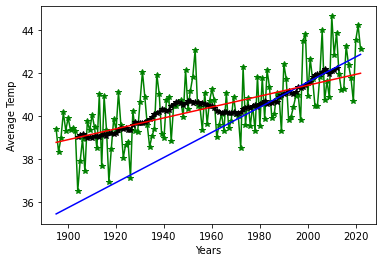

In [14]:
slopee, interr = least_squares_array(temp["Date"][85:117], weight_move_avg((year_temp.iloc[0]).to_list(), wei)[76:-1])
full, whole = least_squares_array(temp["Date"][9:-10], weight_move_avg((year_temp.iloc[0]).to_list(), wei))
xs, ys = slope_to_points(slopee, interr, temp["Date"])
xs2, ys2 = slope_to_points(full, whole, temp["Date"])
line_graph([temp["Date"], temp["Date"][9:-10], xs, xs2], [year_temp.iloc[0], weight_move_avg((year_temp.iloc[0]).to_list(), wei), ys, ys2], x_label = "Years", y_label = "Average Temp", amount=4, colour=['green', 'black', 'blue', 'red'], mark=["*", '*', "", ""], line=['-', '-', '-', "-"])

In [15]:
print(slopee, interr) # for time period 1980-2012
print(full, whole) #1904-2012
#The blue line is time 1980-2012, the red line is 1904-2012

0.05834494134933266 -75.11701796250418
0.02527865814103336 -9.13286034660996


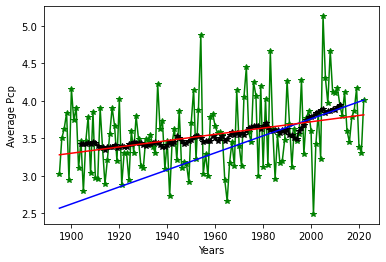

In [16]:
slopee2, interr2 = least_squares_array(pcp["Date"][85:117], weight_move_avg((year_pcp.iloc[0]).to_list(), wei)[76:-1])
full2, whole2 = least_squares_array(pcp["Date"][9:-10], weight_move_avg((year_pcp.iloc[0]).to_list(), wei))
xs3, ys3 = slope_to_points(slopee2, interr2, pcp["Date"])
xs4, ys4 = slope_to_points(full2, whole2, pcp["Date"])
line_graph([pcp["Date"], pcp["Date"][9:-10], xs3, xs4], [year_pcp.iloc[0], weight_move_avg((year_pcp.iloc[0]).to_list(), wei), ys3, ys4], x_label = "Years", y_label = "Average Pcp", amount=4, colour=['green', 'black', 'blue', 'red'], mark=["*", '*', "", ""], line=['-', '-', '-', "-"])

4). Give estimates for the estimated average temperature for the years 2025, 2030 and 2035.

In [17]:
t2012 = weight_move_avg((year_temp.iloc[0]).to_list(), wei)[-1]
t2025 = slopee * 2025 + interr
t2030 = slopee * 2030 + interr
t2035 = slopee * 2035 + interr

print(t2025, t2030, t2035) #estimated average temps in those years

43.03148826989445 43.323212976641116 43.61493768338778


5). Determine if there is any correlation between temperature and time, and temperature and precipitation.

In [18]:
period1 = correlation_array(temp["Date"][9:47], weight_move_avg((year_temp.iloc[0]).to_list(), wei)[0:38])
period2 = correlation_array(temp["Date"][48:84], weight_move_avg((year_temp.iloc[0]).to_list(), wei)[39:75])
period3 = correlation_array(temp["Date"][85:117], weight_move_avg((year_temp.iloc[0]).to_list(), wei)[76:-1])

temp_vs_pcp = correlation_array(weight_move_avg((year_temp.iloc[0]).to_list(), wei)[89:-1], weight_move_avg((year_pcp.iloc[0]).to_list(), wei)[89:-1])

print(period1, period2, period3, temp_vs_pcp)

0.9463045907315742 -0.666823705118742 0.9813346321320882 0.921578462836208
